In [ ]:
# Fig S2-S3-S4, 4

# Datasets Class and Data Analysis  

In our work we investigated 5 datasets that contain several types of movements and diverse brain areas recorded (for more information about datasets check our paper or table "**Datasets Used in Study**" in github repository main page).

Here I demonstrate how to use special dataset class called `NeuralDataset` and how create your own, if you'd like to analyze (with help of **Gyration Plane** and not only that) some other datasets. And how to create **figures S2-S3-S4** and **fig. 4** from our paper.

#### 1. Download datasets

(Gallego: Not all files are uploaded here, since the full size of dataset is 9 Gb. )

In [25]:
!bash prepare_data.sh

prepare_data.sh: line 2: gdown: command not found
Archive:  datasets.zip
  inflating: datasets/churchland2012.mat  
  inflating: datasets/datasets_info.txt  
  inflating: datasets/m1sc_suresh2020/Dataset4_Monkey1_Session1_GraspDataSimultaneousRecording.mat  
  inflating: datasets/m1sc_suresh2020/Dataset3_Monkey3_Session1_GraspDataSimultaneousRecording.mat  
  inflating: datasets/m1sc_suresh2020/Dataset6_Monkey5_Session1_ReachDataSimultaneousRecording.mat  
  inflating: datasets/m1sc_suresh2020/ReadMe.md  
  inflating: datasets/m1sc_suresh2020/Dataset5_Monkey4_Session1_ReachDataSimultaneousRecording.mat  
  inflating: datasets/mc_kalidindi2021/README.md  
  inflating: datasets/mc_kalidindi2021/A5_data/Ayur_A5.mat  
  inflating: datasets/mc_kalidindi2021/A5_data/Patch_A5.mat  
  inflating: datasets/mc_kalidindi2021/A2_data/Ayur_A2.mat  
  inflating: datasets/mc_kalidindi2021/MC_data/Ayur_Data.mat  
  inflating: datasets/mc_kalidindi2021/MC_data/Xander_Data.mat  
  inflating: datasets/mc_

#### 2. Import NeuralDataset class and specify the directory of dataset

In this example we will use only dataset from "*Neural Population Dynamics During Reaching*" by Churchland et al. This dataset contains reaching movements recorded in M1 and PMd brain areas. All data for this dataset are recorded in one matlab file. Firstly we have to load it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.datasets import ReachingChurchland

dataset = ReachingChurchland(dataset_dir='datasets/')
dataset.load_data(dataset_name='churchland2012.mat')

File churchland2012.mat successfully loaded!


Then, we have to pre-process loaded matlab file. In our case, with Churchland's dataset, we don't have to make ant complicated pre-processing. However other datasets (e.g. `GraspingSuresh`) requires a lot of work to do before using it. You can check out all pre-processing in `utils/datasets.py`.

In [2]:
dataset.preprocess_data()

No preprocessing needed! Loaded.


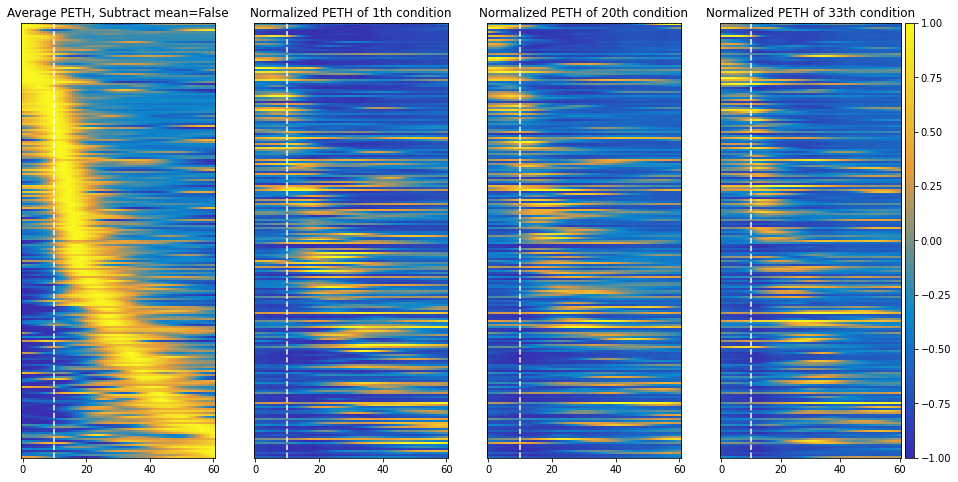

In [3]:
# Now you can use all common methods of NeuralDataset class
dataset.plot_peth(subtract_mean=False, cond_list=[1,20,33],
                  sort_individ=False, save_name=None)

jPCA


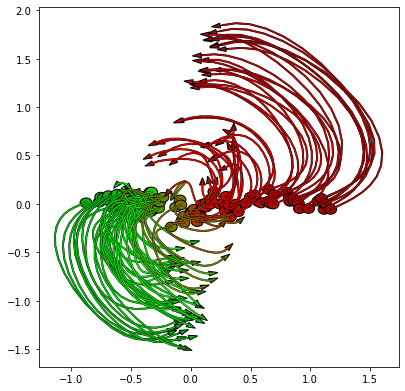

In [14]:
dataset.plot_jpca(tstart=0, tend=20, subtract_mean=True)

Each condition for all neurons


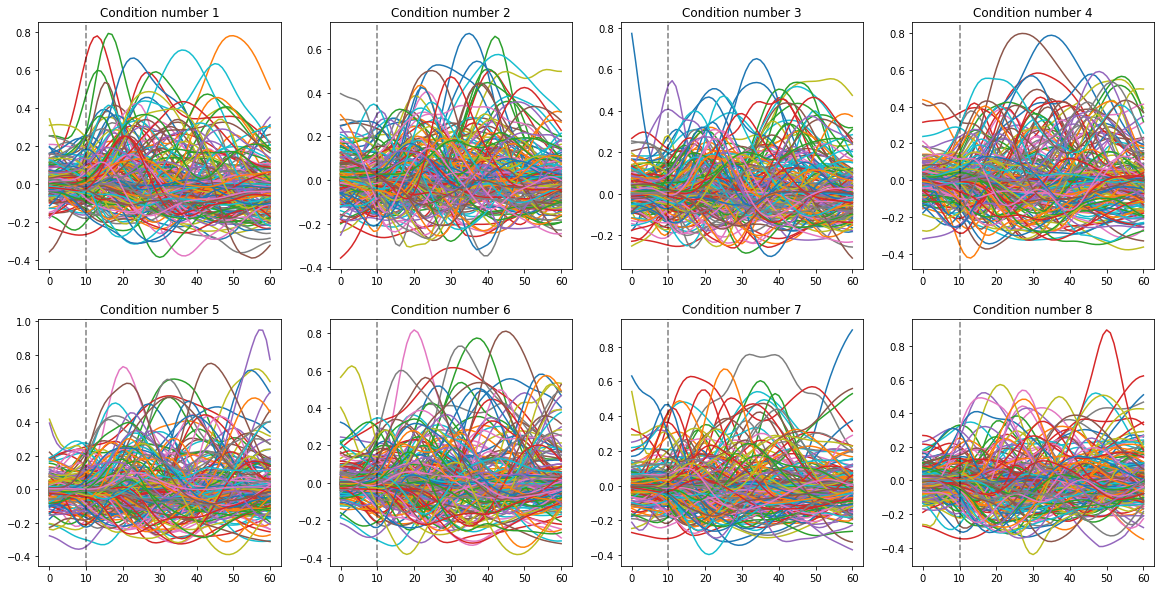

In [15]:
dataset.plot_conditions(subtract_mean=True)

In [18]:
# You can crop recordings and then reset cropped data to the original version
print(f'Original data shape: {dataset.data.shape}')
dataset.crop_data(tstart=10, tend=50)
print(f'After cropping: {dataset.data.shape}')
dataset.reset_data()
print(f'After resetting: {dataset.data.shape}')

Original data shape: (108, 61, 218)
After cropping: (108, 40, 218)
After resetting: (108, 61, 218)


jPCA after 3rd type shuffling
jPCA


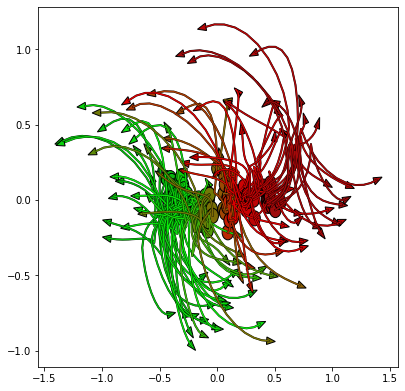

In [19]:
# You can use shufflings of data (from the Churchland paper and CMPT by Micaels et al.)
dataset.shuffle_data(shuffling_type='3')
print('jPCA after 3rd type shuffling')
dataset.plot_jpca(tstart=0, tend=20, subtract_mean=True)

In [8]:
# You can save pre-processed dataset to h5 file
dataset.reset_data()
dataset.save2h5(fname='preprocessed_reachings.h5',  fpath='datasets/')

File preprocessed_reachings.h5 successfully saved!


To create your own dataset class you have to inherit class `YourDataset(NeuralDataset)` and define 4 methods: 
- `load_data` - takes as input `dataset_name` and loads file to `self.data_dict`;

- `preprocess_data` - pre-processing of loaded `self.data_dict`, the final version of data should be written to `self.data`, `self.time` and `self.go_cue` variabele

- `create_info_dict` - create dictionary with all relevant info about dataset. This dict can be saved to .h5 file with `save2h5` method.

- `load_additional_info` - when loading from .h5 file in this method some additional info can be loaded

**Example:**

```python
class YouDataset(NeuralDataset):
    def load_data(self, dataset_name):
        self.data_dict = ...

    def preprocess_data(self, parameters):
        # Some preprocessing
        self.data = ...
        self.time = np.arange(0, 100)
        self.go_cue = self.data_dict['go_cue']

    def create_info_dict(self):
        self.info_d = {'data': self.data,
                       'time': self.time,
                       'go_cue': self.go_cue,
                       'other_params': self.params}
    
    def load_additional_info(self):
        self.other_params = self.info_d['other_params']
```

#### Shufflings

You can also apply shuffling procedures to the data. Choose which shuffling procedure you want to apply and type : `'1'`, `'2'`, `'3'` or `'CMPT'`. 

You can read the detailed description of shufflings in original papers ([here](https://www.nature.com/articles/nature11129) and [here](https://doi.org/10.1371/journal.pcbi.1005175)) or in `utils/shuffling.py`. Also, since CMPT is popular shuffling procedure - feel free to use it in you work!

In [5]:
from utils.datasets import (
    ReachingKalidindi,
    ReachingChurchland,
    ReachingGallego,
    GraspingSuresh,
) 

In [6]:
dat = ReachingKalidindi('datasets/mc_kalidindi2021/A2_data/')
dat.load_data('Ayur_A2.mat')
dat.preprocess_data()

File Ayur_A2.mat successfully loaded!
No preprocessing needed! Loaded.


Shuffled Dataset:
jPCA


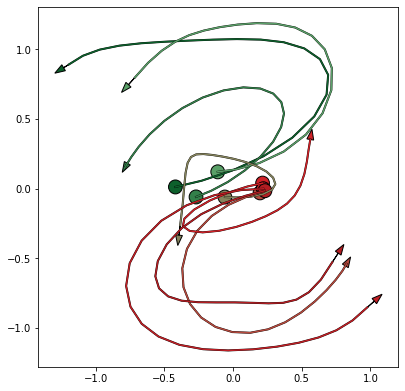

In [7]:
dat.shuffle_data('2')
print('Shuffled Dataset:')
dat.plot_jpca(tstart=0, tend=20)

Initial Dataset:
jPCA


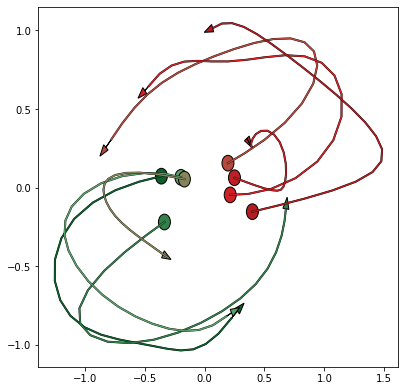

In [8]:
dat.reset_data()
print('Initial Dataset:')
dat.plot_jpca(tstart=0, tend=20)

## Building Figures from Paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from utils.color_palettes import (
    bg_gray_color,
    jpca_palette_journ1,
    GR1, RB1, YP1, YS1,
    journ_color_dict,
    blue_yellow_cmap, BG1)
from utils.data_processing import load_h5_file

import numpy as np
from utils.utils import subtract_cc_mean, soft_normalize
from utils.utils import compute_curvature, pca_rotation
import jPCA
from jPCA.util import plot_projections
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from tqdm import tqdm

from utils.datasets import (
    NeuralDataset,
    GraspingSuresh,
    ReachingGallego,
    ReachingChurchland,
    ReachingKalidindi,
    BehaviouralMante, 
    )

### Figure 4

This figure demonstrates all datasets that we analyse in one **Gyration Plane**. To reproduce that you should download already preprocessed datasets via the cell bellow and then use function `plot_dataset_gyration_plane()`

In [2]:
!bash prepare_preproc_datasets.sh

/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (uriginal): https://drive.google.com/uc?id=1GWUdXJvEQdjf6jlxhfj-D-T5oZyv-Sqq
From (redirected): https://drive.google.com/uc?id=1GWUdXJvEQdjf6jlxhfj-D-T5oZyv-Sqq&confirm=t&uuid=5dfbef5f-ee9b-47c9-9f57-76d0ba0cde6e
To: /home/kate/Documents/Neural-Dynamics-Gyration/preprocessed2h5.zip
100%|████████████████████████████████████████| 564M/564M [01:22<00:00, 6.83MB/s]
Archive:  preprocessed2h5.zip
   creating: preprocessed2h5/
  inflating: preprocessed2h5/Chewie_CO_20150313_M1.h5  
  inflating: preprocessed2h5/Chewie_CO_20150319_M1.h5  
  inflating: preprocessed2h5/Chewie_CO_20150629_M1.h5  
  inflating: preprocessed2h5/Chewie_CO_20150630_M1.h5  
  inflating: preprocessed2h5/Chewie_CO_20160929_M1.h5  
  inflating: preprocessed2h5/Chewi

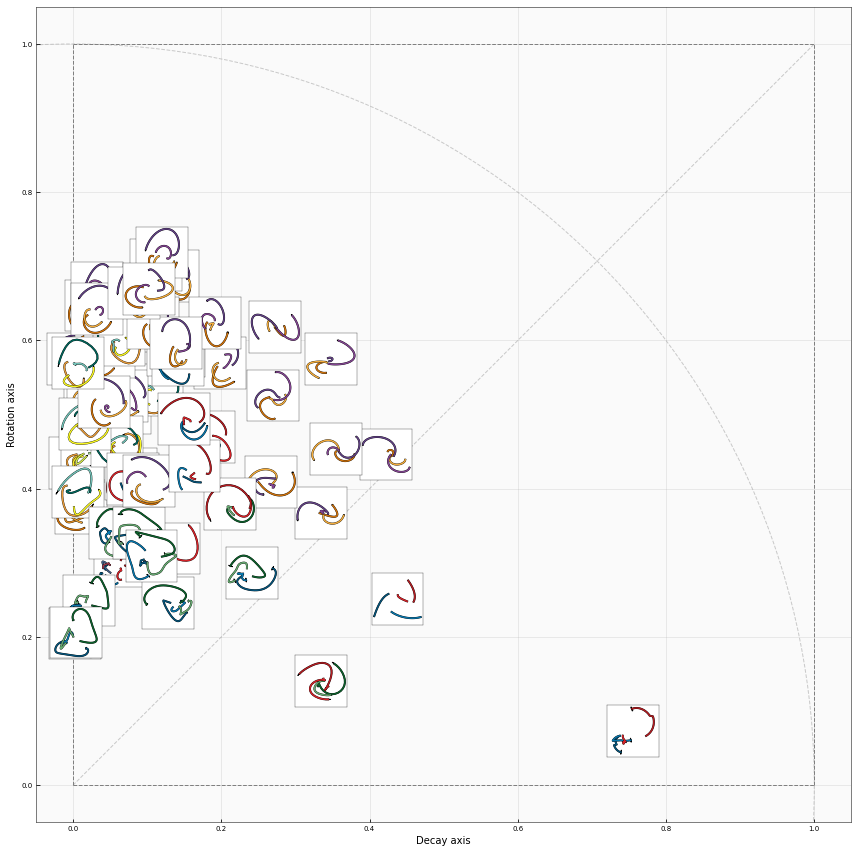

In [2]:
from utils.vis import plot_dataset_gyration_plane

path='preprocessed2h5/'
plot_dataset_gyration_plane(cond_n=8, h5_save_dir=path)

You can build Gyration Plane with your own datasets! Your own dataset should be written to dictionary with keys: 
- `start_pad`, `end_pad` - how many indexes to take from the left side of go cue and from the right side

- `data`, `go_cue` - tensor with data of shape `[cond, time, neurons]` and go cue `index`

- `cmap` - what colormap to use for jPCA, you can use defauls matplotlib colormaps

Save all datasets to `.h5` files in one folder and simply give the path to this folder as input to `plot_dataset_gyration_plane()` function!

### Figure S2-S3

church Dataset:


0it [00:00, ?it/s]/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
108it [04:27,  2.48s/it]
/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


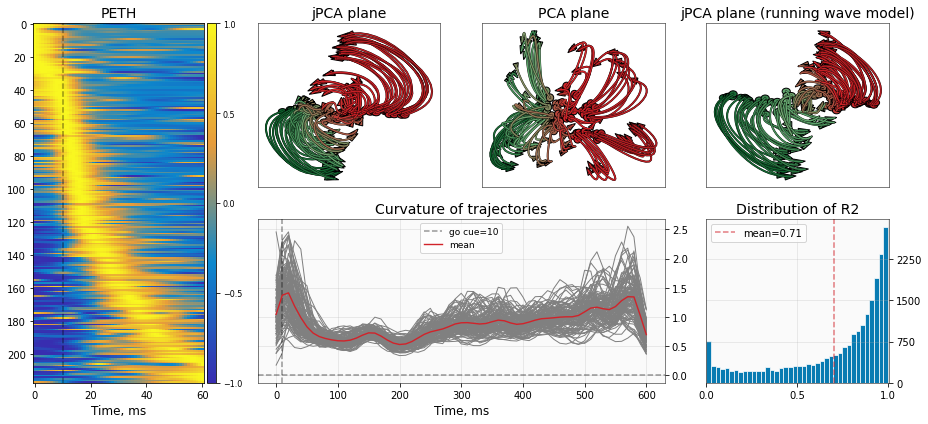

grasp Dataset:


/home/kate/Documents/Neural-Dynamics-Gyration/utils/utils.py:147: RuntimeWarning: invalid value encountered in true_divide
  curvature_val = cross / (speed**(3))
/home/kate/Documents/Neural-Dynamics-Gyration/utils/utils.py:147: RuntimeWarning: invalid value encountered in true_divide
  curvature_val = cross / (speed**(3))
/home/kate/Documents/Neural-Dynamics-Gyration/utils/utils.py:147: RuntimeWarning: invalid value encountered in true_divide
  curvature_val = cross / (speed**(3))
35it [00:06,  5.17it/s]
/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


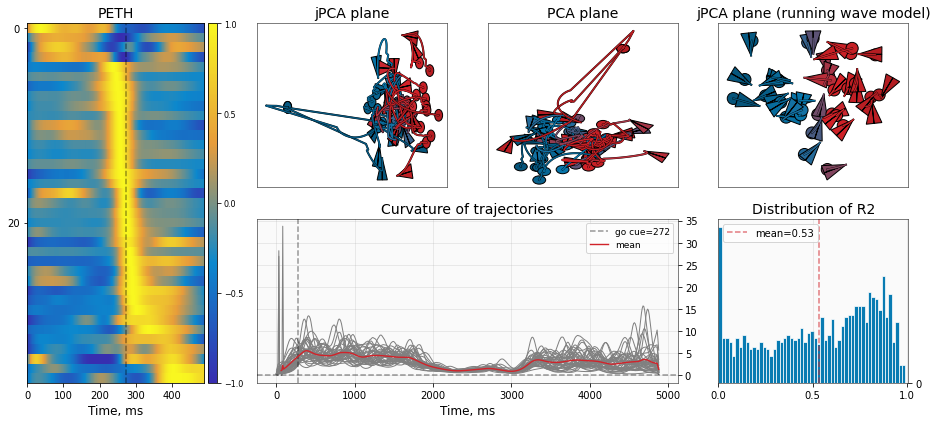

lfp Dataset:


8it [00:05,  1.55it/s]
/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


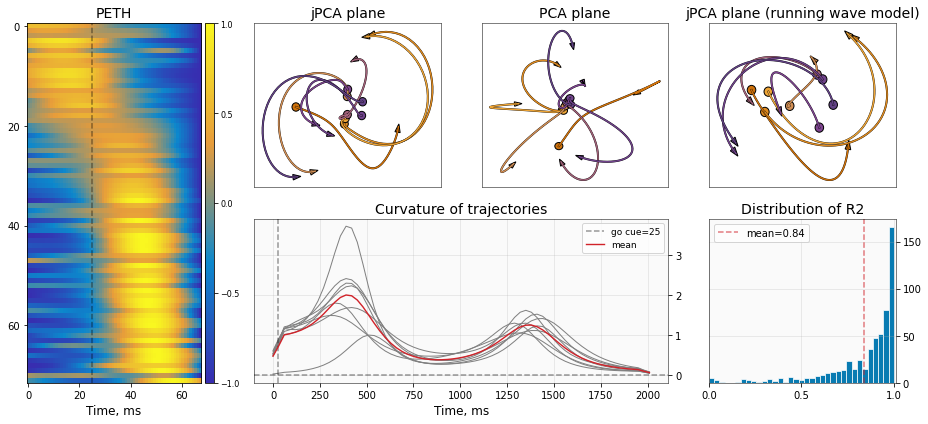

kalid Dataset:


8it [00:07,  1.13it/s]
/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


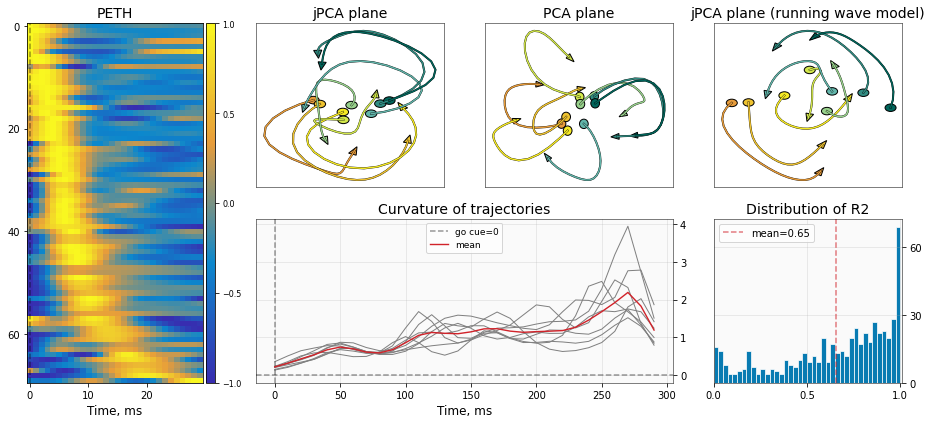

pfc Dataset:


0it [00:00, ?it/s]/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
12it [00:44,  3.67s/it]
/home/kate/anaconda3/envs/CN/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


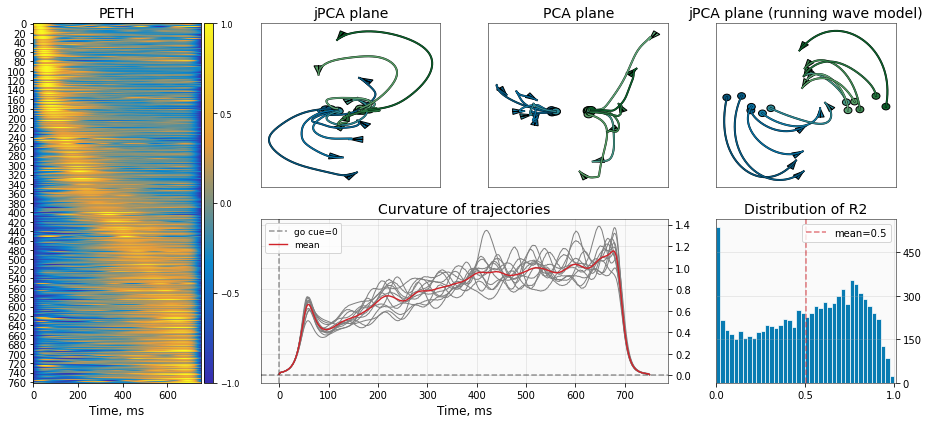

In [5]:
from utils.vis_additional import (
    plot_curvature,
    plot_peth,
    build_jPCA,
    build_pca,
    plot_R2_fitting,
)
from datasets_config import (
    dataset_params,
    data_pathes,
    )

for nam in ['church', 'grasp', 'lfp', 'kalid', 'pfc']:
    print(f'{nam} Dataset:')
    params = dataset_params[nam + '_params']
    dpath = data_pathes[nam]

    d_dict = load_h5_file('', dpath)    
    datas = d_dict["data"]
    go_cue = d_dict["go_cue"]

    fig = plt.figure(figsize=(13, 6), constrained_layout=True)
    gs = GridSpec(2, 4, figure=fig) 
    ax0 = fig.add_subplot(gs[:, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[0, 2])
    ax3 = fig.add_subplot(gs[0, 3])
    ax4 = fig.add_subplot(gs[1, 1:3])
    ax5 = fig.add_subplot(gs[1, 3])

    # 0 - peth
    plot_peth(datas, go_cue, ax0, fs=params['fs'], sub_mean=False)
    ax0.set_xlabel('Time, ms', fontsize=12)
    ax0.set_title('PETH', fontsize=14)

    # 4 - curvature 
    plot_curvature(datas, go_cue, ax4, fs=params['fs'], sub_mean=False)
    ax4.set_xlabel('Time, ms', fontsize=12)
    ax4.set_title('Curvature of trajectories', fontsize=14)

    # 1 - jPCA
    build_jPCA(datas, ax1, params['ts'], params['te'], c_siz=params['c_size'],
               arr_siz=params['arr_size'], cmap=params['cmap'])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(0.5)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('jPCA plane', fontsize=14)

    # 2 - PCA
    build_pca(datas, ax2, params['ts'], params['te'], c_siz=params['c_size_pca'],
              arr_siz=params['arr_size_pca'],
            cmap=params['cmap'])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax2.spines[axis].set_linewidth(0.5)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title('PCA plane', fontsize=14)

    # 3 - jPCA of our fitted model
    t = np.arange(datas.shape[1])
    r2 = plot_R2_fitting(datas, t, ax3, params['ts'], params['te'], 
                         c_siz=params['c_size'], arr_siz=params['arr_size'],
                         cmap=params['cmap'], pfc=params['pfc'], kalid=params['kalid'])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax3.spines[axis].set_linewidth(0.5)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_title('jPCA plane (running wave model)', fontsize=14)

    # 5 - R2 fitting distribution
    ax5.hist(np.array(r2).ravel(), bins=params['bins'], color=journ_color_dict['blue'],
              edgecolor='white', linewidth=0.7)
    ax5.axvline(np.nanmean(r2), c=journ_color_dict['red'],
                label='mean={}'.format(round(np.nanmean(r2), 2)), ls='--', alpha=0.6) 
    ax5.yaxis.tick_right()
    ax5.set_xlim([0., 1.009])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax5.spines[axis].set_linewidth(0.5)

    import matplotlib.ticker as ticker
    ax5.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax5.yaxis.set_major_locator(ticker.MultipleLocator(40))
    ax5.legend()
    ax5.grid(alpha=0.3)
    ax5.set_facecolor(bg_gray_color) 
    ax5.set_title('Distribution of R2', fontsize=14)
    ax5.yaxis.set_major_locator(ticker.MultipleLocator(params['hist_space']))
    ax5.yaxis.tick_right()
    # You can save figure if u want
    # plt.savefig(PATH_DRAFT + nam + '.pdf', dpi=300, format='pdf',
    #             bbox_inches='tight', pad_inches=0.0)
    plt.tight_layout()
    plt.show()

### Figure S4

Gyration plane with PETH of datasets. The datasets location is the same as in gyration plane (Fig. 4). B.
Zoomed inset of gyration plane with PETH

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import os
from utils.data_processing import load_h5_file
from utils.utils import (
    subtract_cc_mean,
    soft_normalize,
    compute_lambdas)
import jPCA
from utils.color_palettes import blue_yellow_cmap
from utils.vis import cmaps

def peth_normalize(x):
    mean = x.mean(axis=0)
    x_ = x - mean
    pmax = np.abs(x_).max(axis=0)
    pmax = np.where(pmax==0, 1, pmax)
    return x_ / (pmax)


def plot_peth_gyration(datas, axis, go_cue=0, colormap=blue_yellow_cmap()):
    """
    Plot PETHs averaged across conditions for a given data
    """
    # sort by average wave maximum
    cc_mean = np.mean(datas, axis=0)
    idxs = np.argmax(cc_mean, axis=0)
    cc_mean_sorted = cc_mean[:, np.argsort(idxs)]

    mean_data_sort_norm = peth_normalize(cc_mean_sorted)
    axis.imshow(mean_data_sort_norm.T, aspect='auto',
                       cmap=colormap, interpolation='none')
    if go_cue != 0:
        axis.axvline(go_cue, c='white', ls='--', alpha=0.45, lw=0.4)

In [5]:
def plot_dataset_gyration_plane(cond_n,
                                h5_save_dir,
                                Q = 1., W = 1., ins_size=0.07, ins_borders = 0.3,
                                save_name=None): 
    d_names = os.listdir(h5_save_dir)

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    for dname in d_names:

        info_d = load_h5_file(h5_save_dir, dname)

        datas = info_d['data']
        cond_n = np.min([datas.shape[0], cond_n])
        datas = datas[:cond_n, :, :]

        start_pad = info_d['start_pad'] if info_d.get('start_pad') is not None else 0
        end_pad = info_d['end_pad'] if info_d.get('end_pad') is not None else datas.shape[1]
        go_cue = info_d['go_cue'] if info_d.get('go_cue') is not None else 0

        time = np.arange(0, datas.shape[1]) # info_d['time']
        tstart = np.max([0, go_cue-start_pad])
        tend = np.min([len(time)-1, go_cue+end_pad])

        # fit jPCA
        datas_list = [datas[i] for i in range(datas.shape[0])]
        jpca = jPCA.JPCA(num_jpcs=6)
        (projected, _, _, _) = jpca.fit(datas_list, times=list(time), 
                tstart=tstart+1, tend=tend, subtract_cc_mean=True, num_pcs=6, pca=True)
    
        datas = soft_normalize(datas)
        peth_data = datas.copy()
        datas = subtract_cc_mean(datas)
        datas = datas[:, tstart:tend, :]
        time = time[:tend]

        Xeig = compute_lambdas(datas)
        xnom = np.abs(np.real(Xeig[0])) + np.abs(np.real(Xeig[1]))
        ynom = np.abs(np.imag(Xeig[0])) + np.abs(np.imag(Xeig[1]))
        x = xnom / (np.abs(Xeig).sum()) * Q
        y = ynom / (np.abs(Xeig).sum()) * W
    
        ins = ax.inset_axes([x - ins_size/2, y - ins_size/2, ins_size, ins_size], transform=ax.transData)
        ins.set_aspect('equal', adjustable='datalim')
        for axis in ['top', 'bottom', 'left', 'right']:
            ins.spines[axis].set_linewidth(ins_borders)
        
        if info_d.get('cmap') is not None:
            cmap = info_d['cmap']
            color_pal = cmap.decode("utf-8")
        else:
            color_pal = 'grasping'

        plot_peth_gyration(peth_data, axis=ins, go_cue=0, colormap=cmaps[color_pal])

        ins.set_xticks([])
        ins.set_yticks([])
    ax.plot([0,0], [0,1], lw=1, ls='--', color='grey') 
    ax.plot([0,1], [0,0], lw=1, ls='--', color='grey') 
    ax.plot([0,1], [1,1], lw=1, ls='--', color='grey') 
    ax.plot([1,1], [0,1], lw=1, ls='--', color='grey') 
    ax.plot([0,1], [0,1], lw=1, ls='--', color='grey', alpha=0.4)
    ax.grid(alpha=0.3)
    circle2 = plt.Circle((0, 0), 1, color='grey',lw=1, ls='--', fill=False, alpha=0.4)
    ax.add_patch(circle2)
    ax.set_ylabel('Rotation axis', fontsize=10)
    ax.set_xlabel('Decay axis', fontsize=10)
    ax.set_facecolor('#fafafa')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.tick_params(axis="y",direction="in", labelsize=7)
    ax.tick_params(axis="x",direction="in", labelsize=7)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0.5)
    if save_name:
        plt.savefig(save_name, dpi=300, format='pdf',
                bbox_inches='tight', pad_inches=0.0)

    plt.show()
    plt.close()

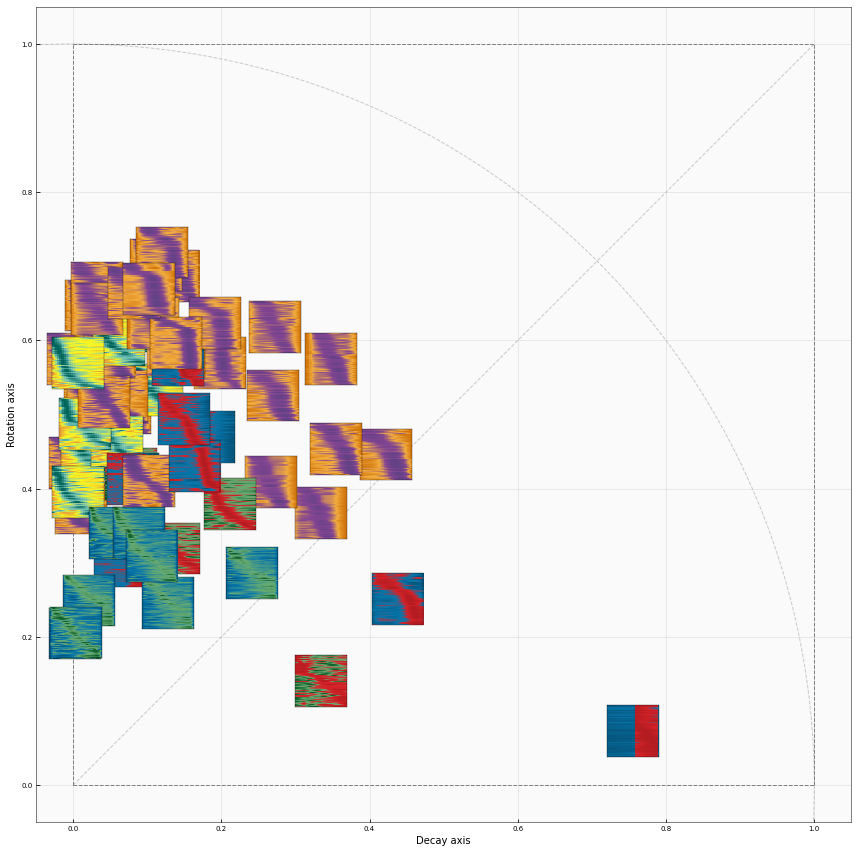

In [6]:
path='preprocessed2h5/'
plot_dataset_gyration_plane(cond_n=8, h5_save_dir=path)

## Pre-processing parameters of datasets used in studies

| Article & Authors                                                                                                                 | Our Paper Smoothing Sigma (ms)   | Frequency Sampling (sec)     | Original Smoothing Sigma (ms)             |
|-----------------------------------------------------------------------------------------------------------------------------------|------------------------|------------------------------|-------------------------------------------|
| "Neural Population Dynamics During Reaching", Churchland et al.                                                                   | same as original paper | 0.01 (1 time point = 10 ms)  | 20 / 24 ms S.D. (for diff datasets)       |
| "Neural Population Dynamics in Motor Cortex are Different for Reach and Grasp", Suresh et al.                                     | 70                     | 0.01 (1 time point = 10 ms)  | 25 ms S.D.                                |
| "Local field potentials reflect cortical population dynamics in a region-specific and frequency-dependent manner", Gallego et al. | 50                     | 0.001 (1 time point = 30 ms) | bins of size 30 ms                        |
| "Rotational dynamics in motor cortex are consistent with a feedback controller", Kalidindi et al.                                 | same as original paper | -                            | 30 ms S.D.                                |
| "Context-dependent Computation by Recurrent Dynamics in Prefrontal Cortex", Mante et al.                                          | 20                     | 0.001 (1 time point = 1 ms)  | 12.5 ms and 50 ms (for plots and fitting) |